# Forecasting
Below done with test data, same format as df_data

In [1]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
import numpy as np
import pandas as pd
main_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))) # script directory
python_dir = os.path.join(main_dir, 'RGCPD')
if python_dir not in sys.path:
    sys.path.append(main_dir)
    sys.path.append(python_dir)

In [2]:
from func_fc import fcev

In [3]:
fc = fcev.get_test_data()
fc.df_data

t2mmax_E-US  10_1_sst  10_2_sst  10_3_sst  10_4_sst  10_5_sst  \
0 1979-01-09     1.209692 -0.002358 -0.640111  0.196276  0.057467  0.237060   
  1979-01-19     4.785123 -0.110194 -0.953155  0.366249  0.707406  0.108859   
  1979-01-29     2.851309  0.236436 -0.972786  0.292984  0.368679  0.432925   
  1979-02-08    -0.657271  0.345124 -1.770945  0.197799  0.429169  0.283745   
  1979-02-18     2.791270  0.276122 -1.863202  0.203110  1.323097  0.274132   
...                   ...       ...       ...       ...       ...       ...   
9 2018-07-18     3.968986 -0.675813 -2.469675 -0.422750 -1.308344 -0.417246   
  2018-07-28     2.238003 -0.648225 -2.448345 -0.600959 -1.374351 -0.582658   
  2018-08-07     3.732656 -0.765411 -1.932817 -0.432728 -1.317764 -0.976963   
  2018-08-17     2.904398 -0.574298 -0.502468 -0.736948 -1.110559 -0.512167   
  2018-08-27     3.712742 -0.559711 -1.473981 -0.748247 -1.182788 -0.319890   

              10_6_sst  10_7_sst  10_8_sst  10_9_sst  ...  10_33_sst  \
0 1979-01-09 -0.000282  0.242272 -0.000078  0.213448  ...  -0.000086   
  1979-01-19 -0.000010 -0.063588 -0.000032 -0.084638  ...  -0.000035   
  1979-01-29 -0.000034 -0.070227 -0.000016 -0.022379  ...  -0.000017   
  1979-02-08 -0.000039 -0.262285 -0.000018  0.430139  ...  -0.000019   
  1979-02-18 -0.000032 -0.339325 -0.000015  0.570800  ...  -0.000014   
...                ...       ...       ...       ...  ...        ...   
9 2018-07-18 -1.376140 -0.037969  0.126485  0.106602  ...   0.375511   
  2018-07-28 -0.952557  0.053456  0.262430  0.204259  ...   0.097509   
  2018-08-07 -0.837603  0.085470  0.533442  0.374150  ...  -0.099843   
  2018-08-17 -0.759573  0.205525  0.772225 -0.327085  ...  -0.090738   
  2018-08-27 -1.540097  0.090336  0.748587  0.022415  ...   0.125006   

              10_1_sm123  10_2_sm123  10_3_sm123  10_4_sm123  10_1_z500hpa  \
0 1979-01-09   -0.006955    0.039964   -0.012784    0.021248   -703.676793   
  1979-01-19    0.020658    0.030602   -0.010177    0.009940   -240.052874   
  1979-01-29    0.013061   -0.014665   -0.016978    0.017121   -603.139468   
  1979-02-08    0.005370   -0.023987   -0.003841   -0.018779   -661.228052   
  1979-02-18    0.015524   -0.039493    0.000017   -0.037149    408.557069   
...                  ...         ...         ...         ...           ...   
9 2018-07-18   -0.011010   -0.021522   -0.021667   -0.050003    169.678493   
  2018-07-28    0.016049   -0.013829   -0.030041   -0.004447   -266.045735   
  2018-08-07    0.008921    0.023220   -0.022932   -0.006482     86.333530   
  2018-08-17    0.052523    0.024209   -0.008351   -0.018666    197.684934   
  2018-08-27    0.031301    0.008460   -0.000084   -0.004940    -32.060882   

              10_2_z500hpa  10_4_z500hpa  TrainIsTrue  RV_mask  
0 1979-01-09   -886.437462    262.686430         True    False  
  1979-01-19   1704.986875   -111.029630         True    False  
  1979-01-29   1485.975214   -574.192998         True    False  
  1979-02-08    897.245203   -239.124416         True    False  
  1979-02-18   1047.023454  -1024.174593         True    False  
...                    ...           ...          ...      ...  
9 2018-07-18   -149.298995    397.275655        False     True  
  2018-07-28    -72.397720    651.056435        False     True  
  2018-08-07     70.394108    122.711885        False     True  
  2018-08-17   -192.055925    597.124587        False     True  
  2018-08-27    402.715647     84.887218        False     True  

[9600 rows x 35 columns]

In [4]:
fc.get_TV(kwrgs_events=None)

Define statmodel:

In [5]:
logit = ('logit', None)

GBR_logitCV = ('GBR-logitCV', 
              {'max_depth':3,
               'learning_rate':1E-3,
               'n_estimators' : 750,
               'max_features':'sqrt',
               'subsample' : 0.6,
               'random_state':60} )  

In [6]:
fc.fit_models(stat_model_l=[GBR_logitCV, logit], lead_max=75, 
                   keys_d='all', kwrgs_pp={})

getting keys associated with name all
tfreq: 10, max lag: 8, i.e. 75 days
Progress 100%

('GBR-logitCV', {'max_depth': 3, 'learning_rate': 0.001, 'n_estimators': 750, 'max_features': 'sqrt', 'subsample': 0.6, 'random_state': 60}) 
Progress 100%

('logit', None) 


In [7]:
dict_experiments = {}       
fc.perform_validation(n_boot=100, blocksize='auto', 
                              threshold_pred=(2, 'times_clim'))
dict_experiments['test'] = fc.dict_sum

ROC area	: 0.910
P-R area	: 0.825
BSS     	: 0.510
Precision       : 0.877
Accuracy        : 0.850
ROC area	: 0.897
P-R area	: 0.799
BSS     	: 0.463
Precision       : 0.812
Accuracy        : 0.825


0 GBR-logitCV
1 logit


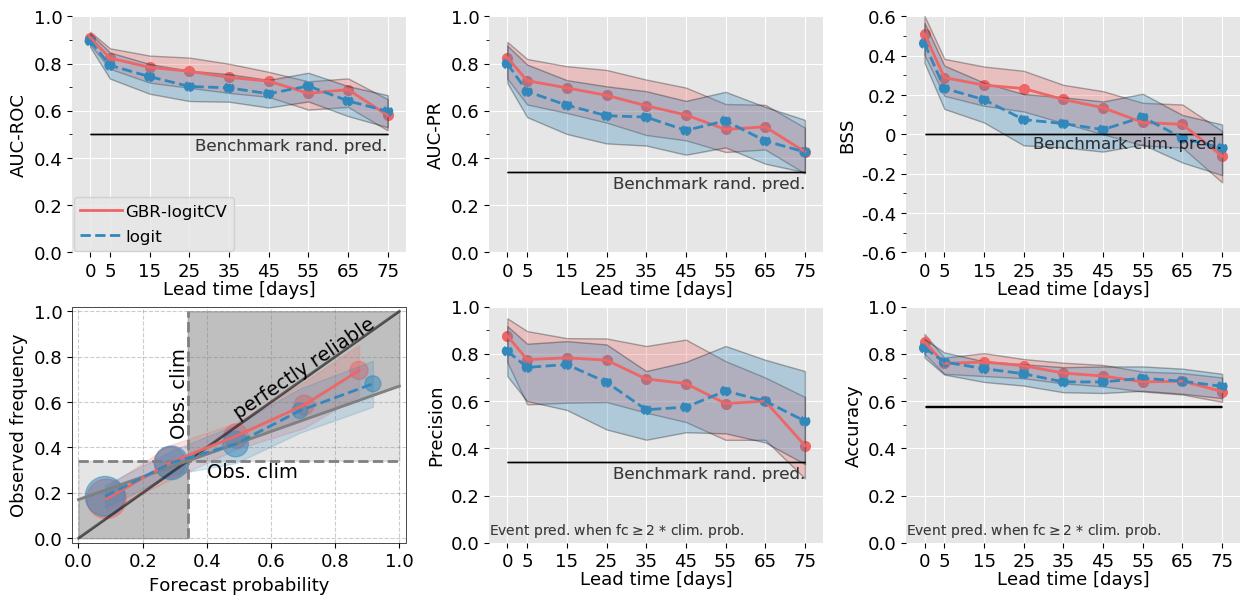

In [8]:
import valid_plots as dfplots
kwrgs = {'wspace':0.25, 'col_wrap':3, 'threshold_bin':fc.threshold_pred}
met = ['AUC-ROC', 'AUC-PR', 'BSS', 'Rel. Curve', 'Precision', 'Accuracy']
expers = list(dict_experiments.keys())
models   = list(dict_experiments[expers[0]].keys())
line_dim = 'model'


fig = dfplots.valid_figures(dict_experiments, expers=expers, models=models,
                          line_dim=line_dim, 
                          group_line_by=None,  
                          met=met, **kwrgs)

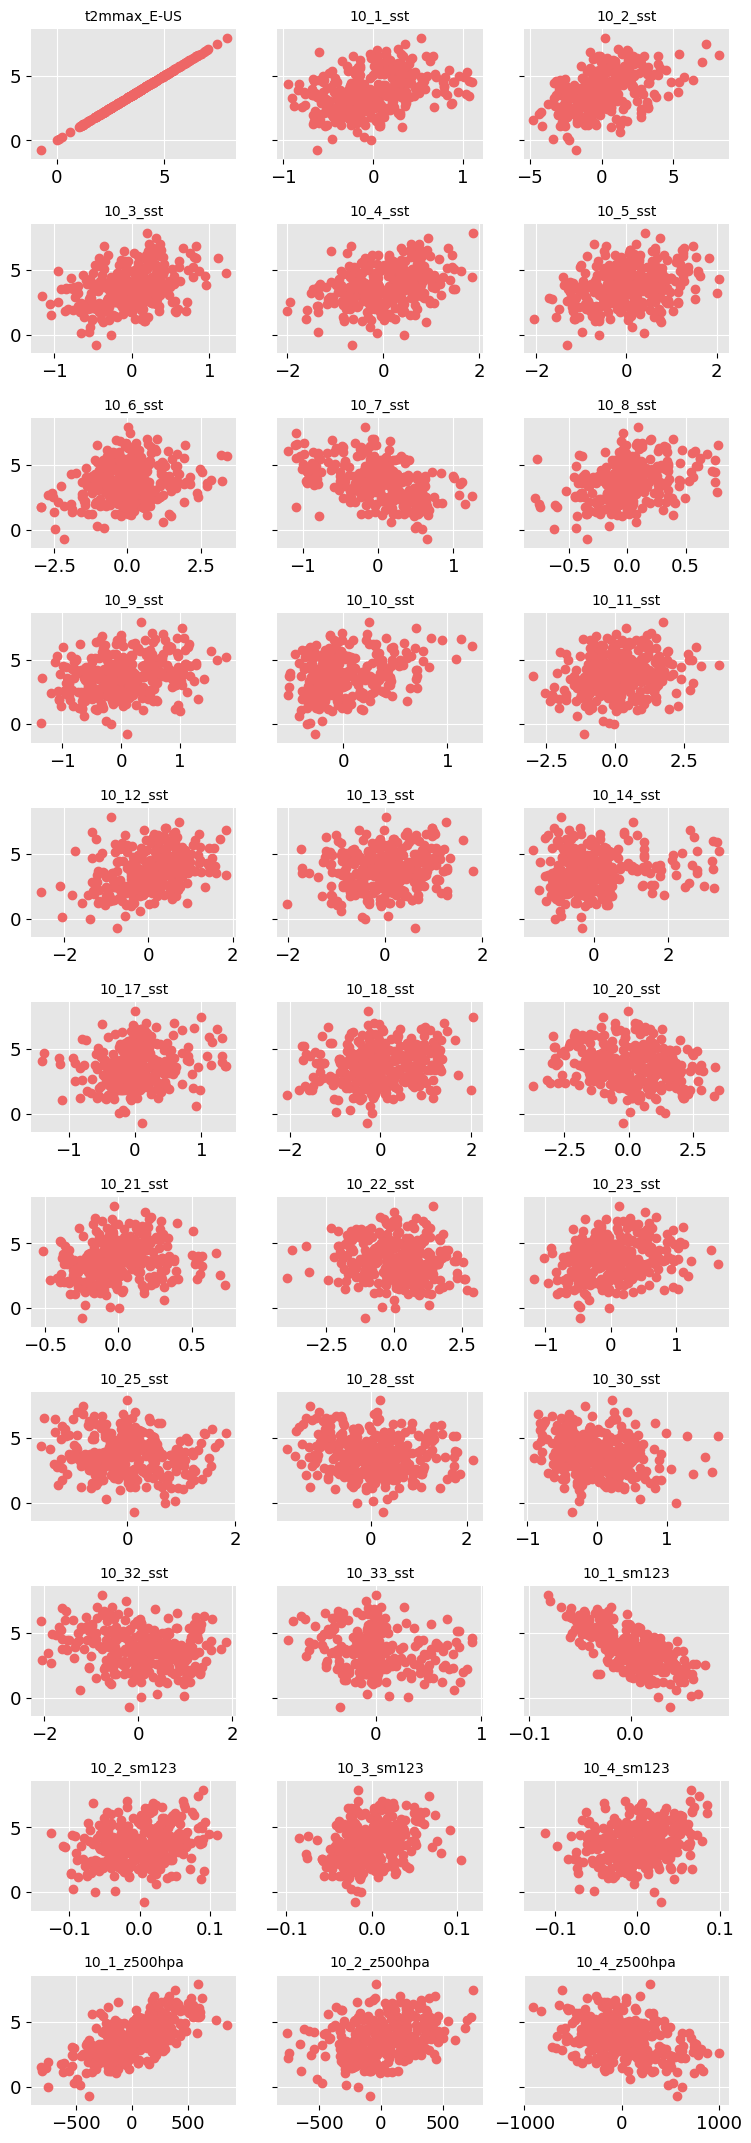

In [9]:
fc.plot_scatter()